In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "piemonte"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,1,Piemonte,2,0,2,1,3,0,0,...,0.0,0.0,0.0,0.0,0.00,66.67,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,1,Piemonte,2,0,2,1,3,0,0,...,0.0,15.0,0.0,0.0,0.00,66.67,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,1,Piemonte,2,0,2,0,2,-1,-1,...,0.0,0.0,0.0,-1.0,0.00,100.00,-inf,0.00,0.00,-33.33
3,2020-02-28T18:00:00,1,Piemonte,7,0,7,4,11,9,9,...,0.0,71.0,0.0,4.0,0.00,63.64,12.68,0.00,0.00,450.00
4,2020-02-29T17:00:00,1,Piemonte,7,0,7,4,11,0,0,...,0.0,81.0,0.0,0.0,0.00,63.64,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,2021-01-19T17:00:00,1,Piemonte,2500,168,2668,11770,14438,-351,716,...,34.0,20319.0,5799.0,-383.0,6.30,18.48,3.52,12.35,1.20,-2.37
330,2021-01-20T17:00:00,1,Piemonte,2466,165,2631,11274,13905,-533,606,...,43.0,18868.0,3845.0,-496.0,6.27,18.92,3.21,15.76,-1.79,-3.69
331,2021-01-21T17:00:00,1,Piemonte,2419,159,2578,11015,13593,-312,761,...,29.0,17448.0,4886.0,-259.0,6.17,18.97,4.36,15.58,-3.64,-2.24
332,2021-01-22T17:00:00,1,Piemonte,2342,152,2494,10862,13356,-237,849,...,23.0,21060.0,3870.0,-153.0,6.09,18.67,4.03,21.94,-4.40,-1.74


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 23, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 931
Nuovi tamponi: 23769.0
Percentuale nuovi positivi/nuovi tamponi: 3.9 %
Nuovi guariti: 806.0
Nuovi deceduti: 26.0
Variazione positivi ricoverati con sintomi: -5.0
Variazione positivi in terapia intensiva: 4.0
Variazione positivi in isolamento dimiciliare: 100.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 23, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-24T17:00:00,1,Piemonte,5116,404,5520,71555,77075,152,2070,...,73.0,14536.0,8282.0,143.0,7.32,7.16,14.24,24.99,1.25,0.20
1,2020-11-25T17:00:00,1,Piemonte,5095,403,5498,72423,77921,846,2878,...,84.0,21540.0,8576.0,868.0,7.33,7.06,13.36,33.56,-0.25,1.10
2,2020-11-26T17:00:00,1,Piemonte,4992,403,5395,73011,78406,485,2751,...,72.0,22418.0,9485.0,588.0,7.47,6.88,12.27,29.00,0.00,0.62
3,2020-11-27T17:00:00,1,Piemonte,4922,395,5317,72272,77589,-817,3149,...,97.0,23141.0,9094.0,-739.0,7.43,6.85,13.61,34.63,-1.99,-1.04
4,2020-11-28T17:00:00,1,Piemonte,4781,384,5165,70912,76077,-1512,2157,...,98.0,18434.0,7886.0,-1360.0,7.43,6.79,11.70,27.35,-2.78,-1.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-01-19T17:00:00,1,Piemonte,2500,168,2668,11770,14438,-351,716,...,34.0,20319.0,5799.0,-383.0,6.30,18.48,3.52,12.35,1.20,-2.37
57,2021-01-20T17:00:00,1,Piemonte,2466,165,2631,11274,13905,-533,606,...,43.0,18868.0,3845.0,-496.0,6.27,18.92,3.21,15.76,-1.79,-3.69
58,2021-01-21T17:00:00,1,Piemonte,2419,159,2578,11015,13593,-312,761,...,29.0,17448.0,4886.0,-259.0,6.17,18.97,4.36,15.58,-3.64,-2.24
59,2021-01-22T17:00:00,1,Piemonte,2342,152,2494,10862,13356,-237,849,...,23.0,21060.0,3870.0,-153.0,6.09,18.67,4.03,21.94,-4.40,-1.74


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

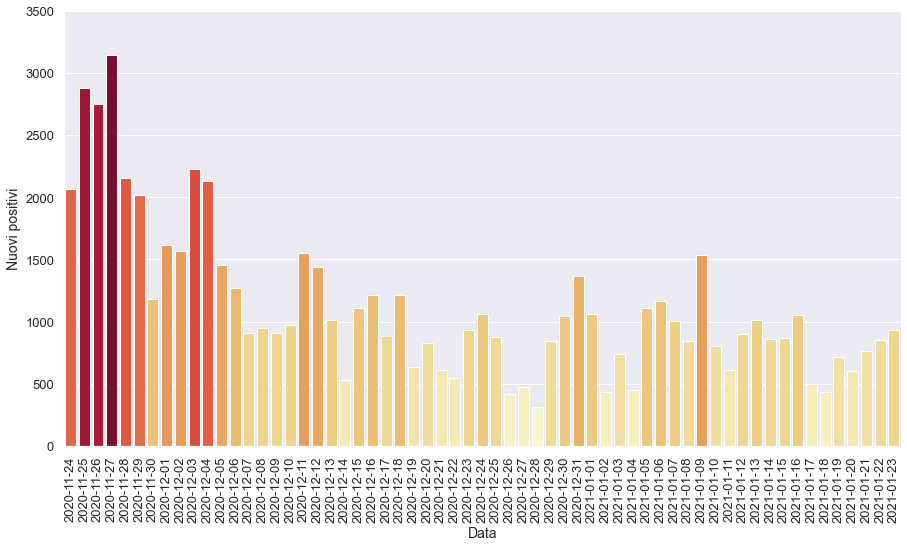

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

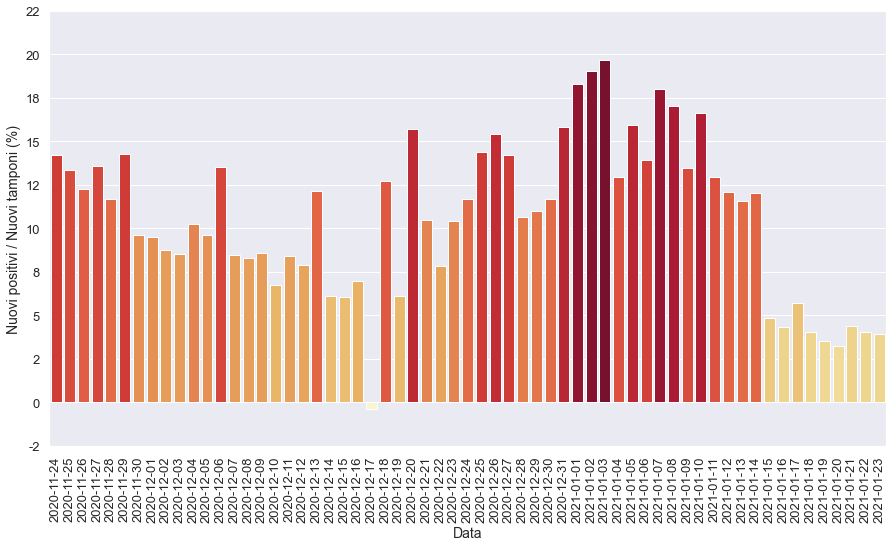

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

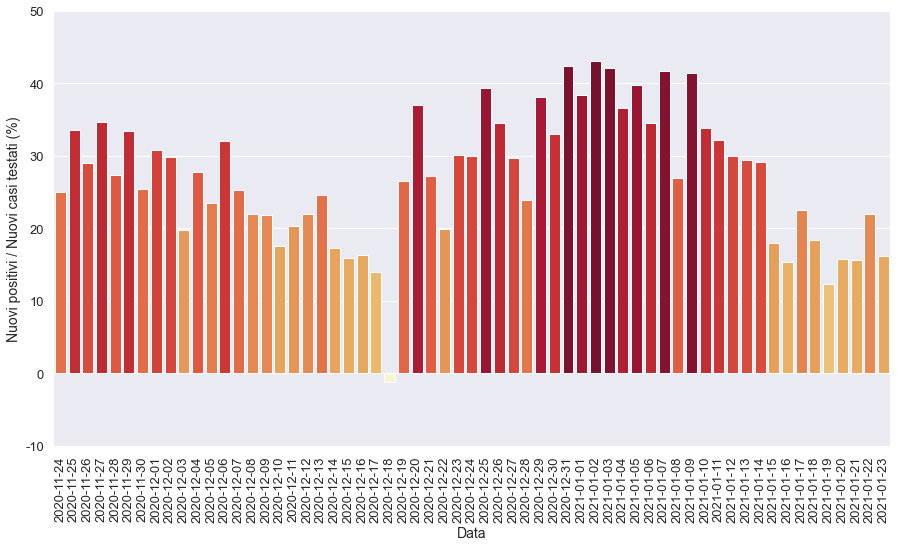

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

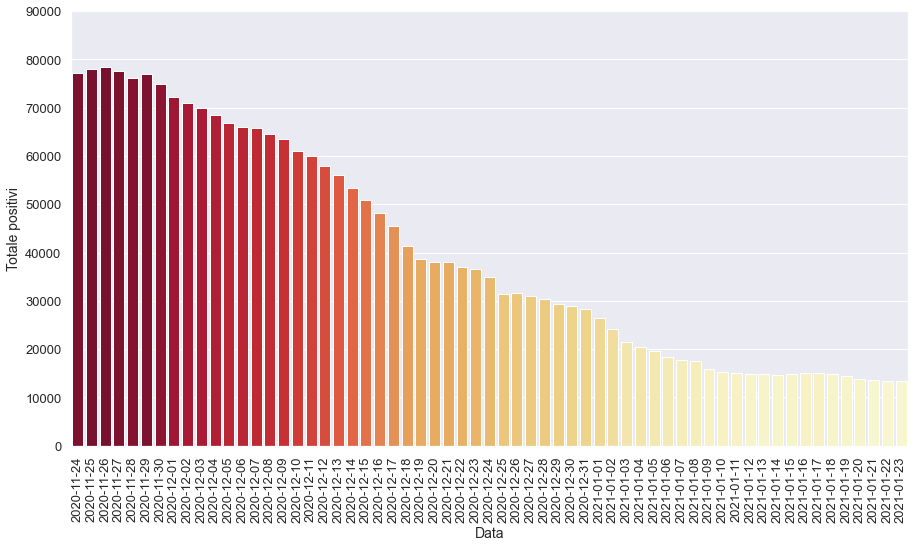

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

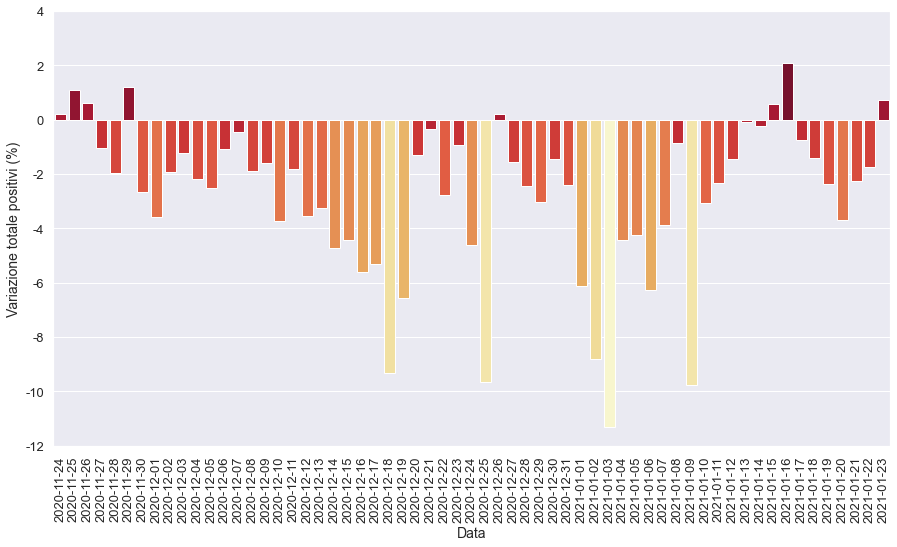

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

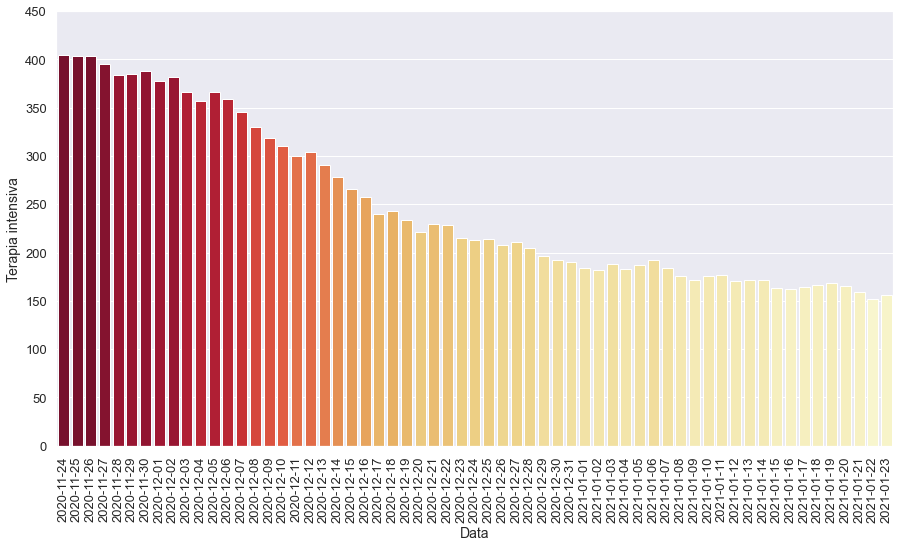

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

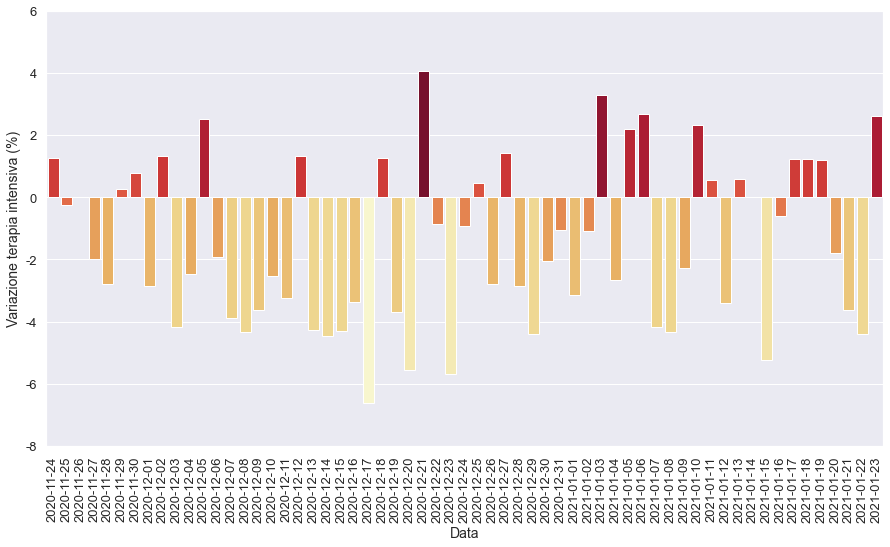

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

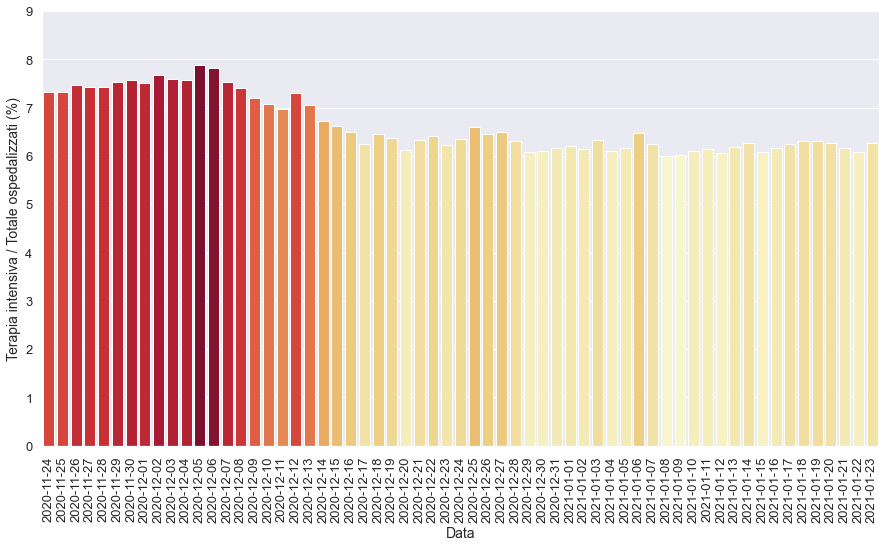

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

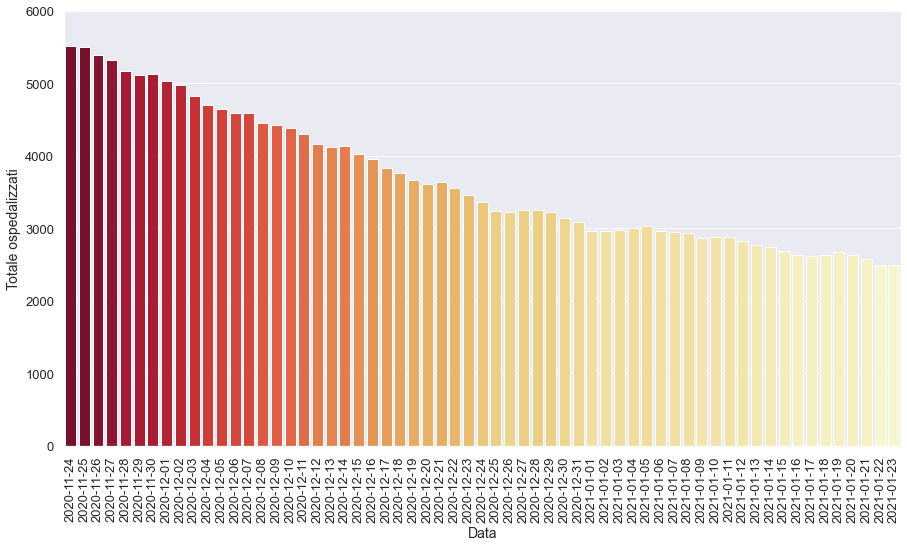

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

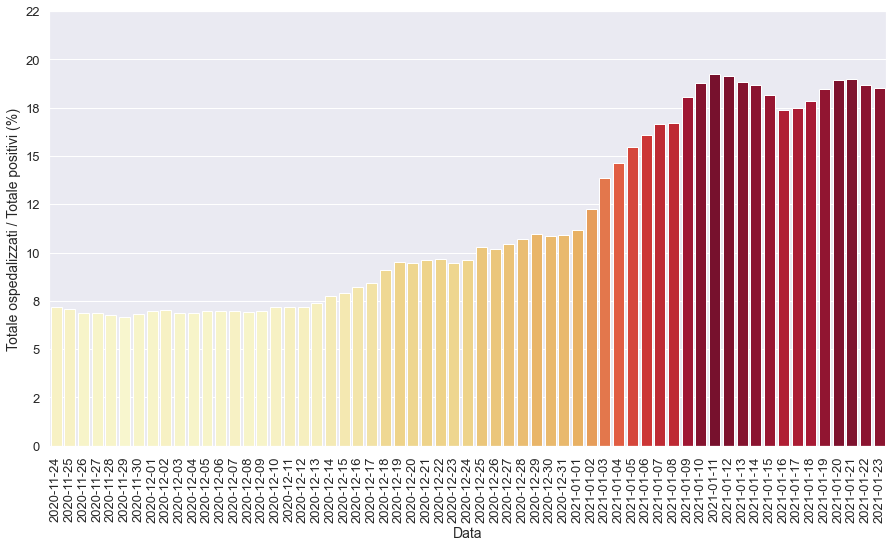

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

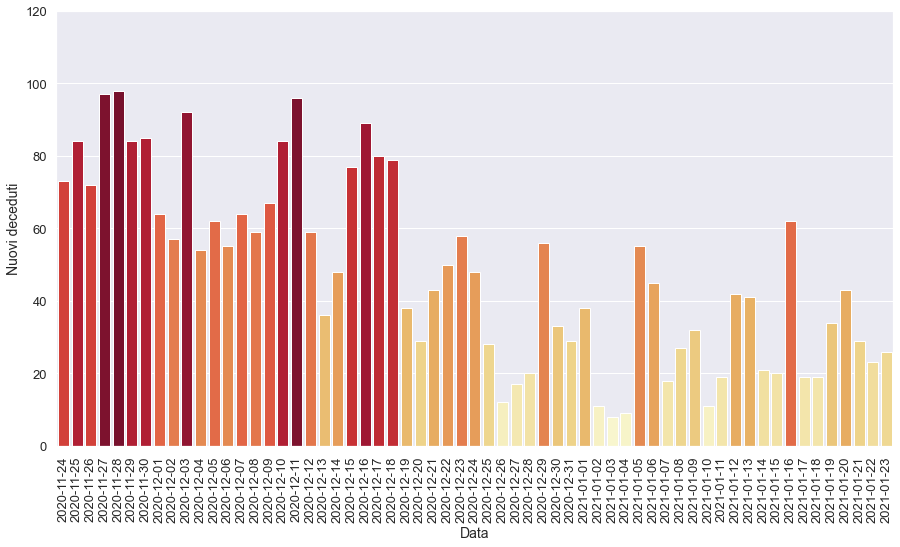

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

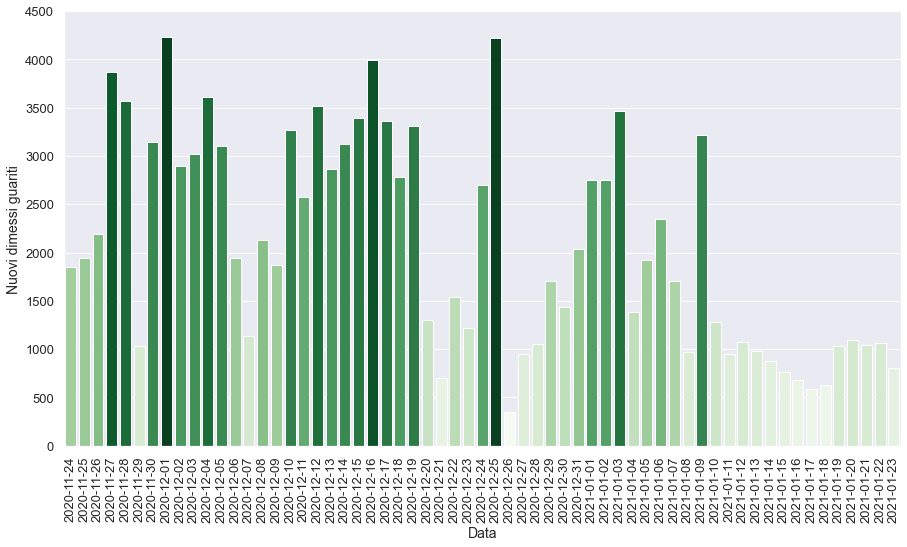

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-24T17:00:00,1,Piemonte,3144,213,3357,31513,34870,-1691,1057,...,48.0,9046.0,3519.0,-1594.0,6.34,9.63,11.68,30.04,-0.93,-4.63
1,2020-12-25T17:00:00,1,Piemonte,3029,214,3243,28254,31497,-3373,875,...,28.0,6080.0,2223.0,-3259.0,6.60,10.30,14.39,39.36,0.47,-9.67
2,2020-12-26T17:00:00,1,Piemonte,3011,208,3219,28338,31557,60,417,...,12.0,2704.0,1206.0,84.0,6.46,10.20,15.42,34.58,-2.80,0.19
3,2020-12-27T17:00:00,1,Piemonte,3039,211,3250,27812,31062,-495,470,...,17.0,3302.0,1583.0,-526.0,6.49,10.46,14.23,29.69,1.44,-1.57
4,2020-12-28T17:00:00,1,Piemonte,3042,205,3247,27056,30303,-759,313,...,20.0,2941.0,1309.0,-756.0,6.31,10.72,10.64,23.91,-2.84,-2.44
5,2020-12-29T17:00:00,1,Piemonte,3029,196,3225,26158,29383,-920,840,...,56.0,7637.0,2204.0,-898.0,6.08,10.98,11.00,38.11,-4.39,-3.04
6,2020-12-30T17:00:00,1,Piemonte,2957,192,3149,25810,28959,-424,1046,...,33.0,8967.0,3170.0,-348.0,6.10,10.87,11.66,33.00,-2.04,-1.44
7,2020-12-31T17:00:00,1,Piemonte,2895,190,3085,25172,28257,-702,1367,...,29.0,8633.0,3221.0,-638.0,6.16,10.92,15.83,42.44,-1.04,-2.42
8,2021-01-01T17:00:00,1,Piemonte,2784,184,2968,23561,26529,-1728,1058,...,38.0,5787.0,2754.0,-1611.0,6.20,11.19,18.28,38.42,-3.16,-6.12
9,2021-01-02T17:00:00,1,Piemonte,2777,182,2959,21238,24197,-2332,433,...,11.0,2271.0,1004.0,-2323.0,6.15,12.23,19.07,43.13,-1.09,-8.79


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

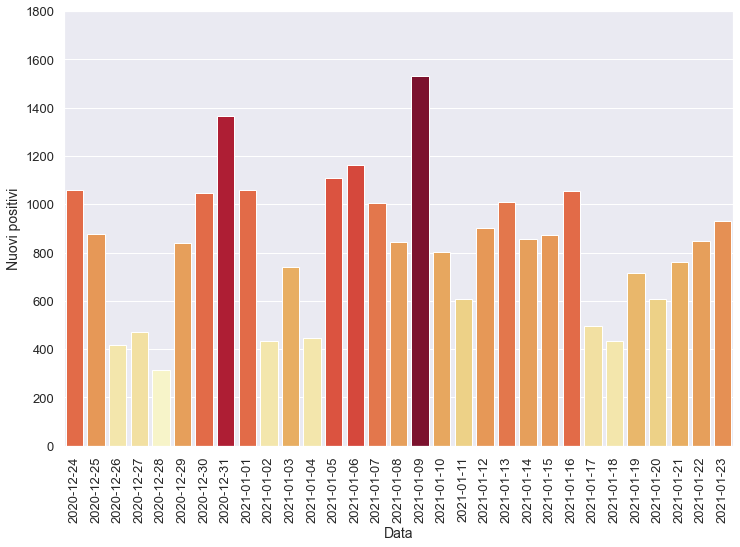

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

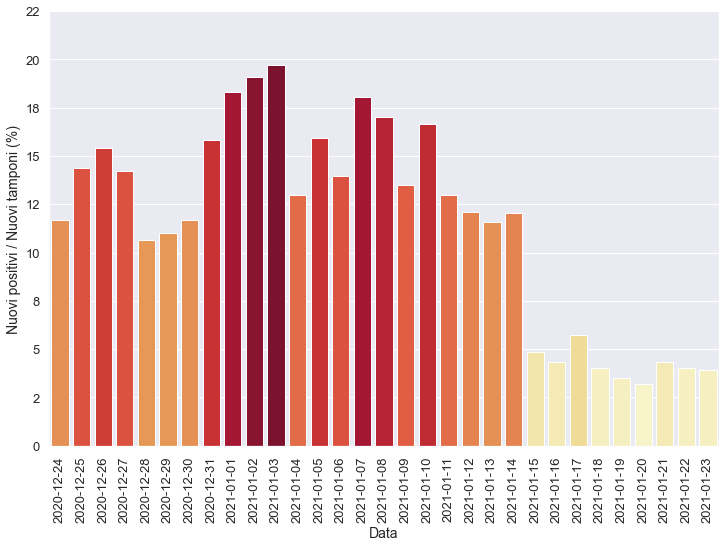

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

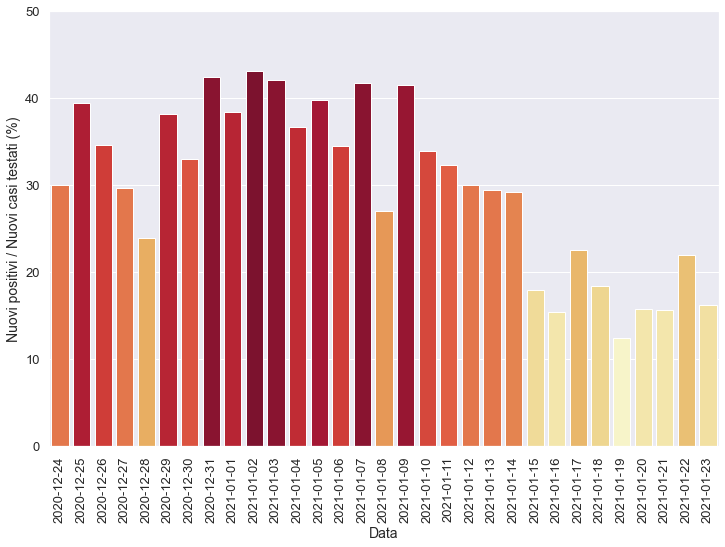

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

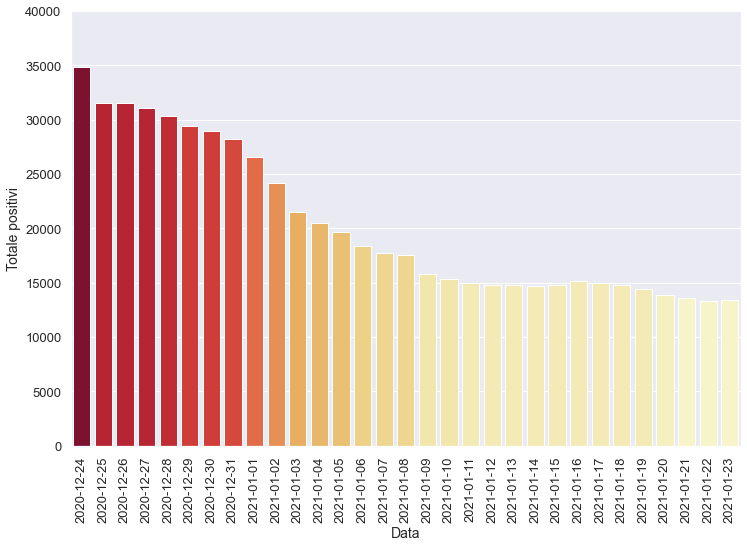

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

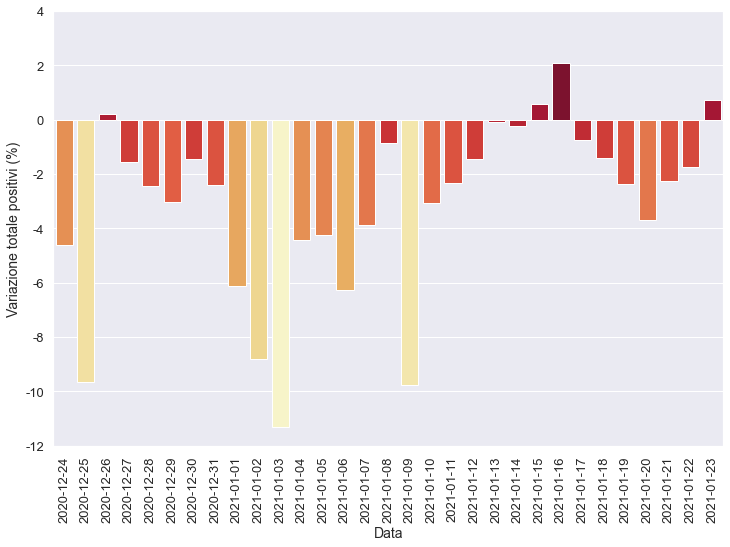

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

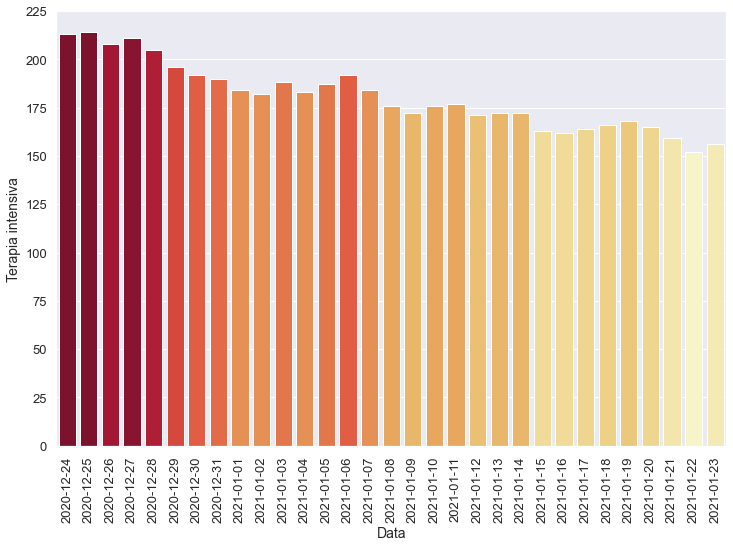

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

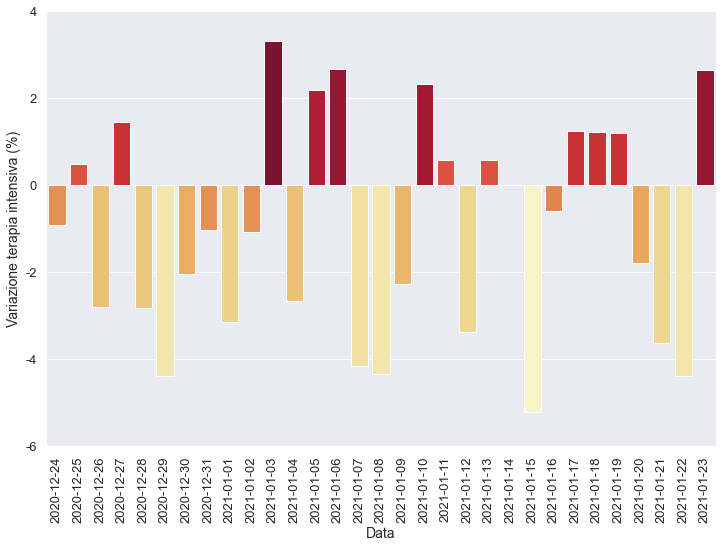

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

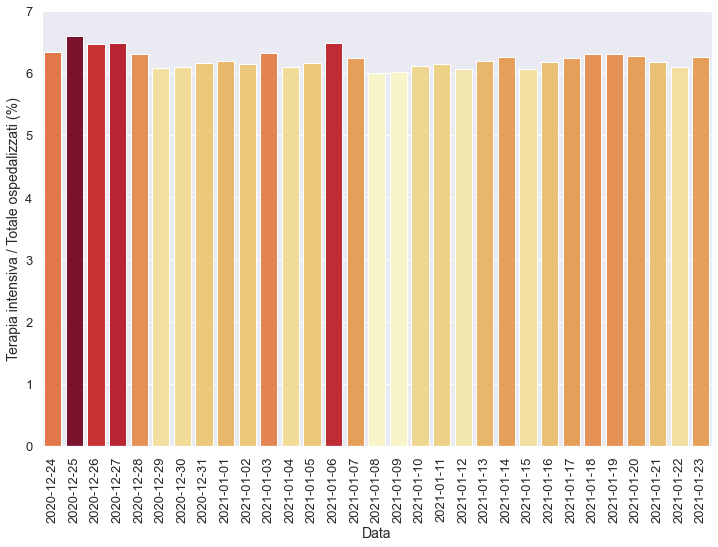

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

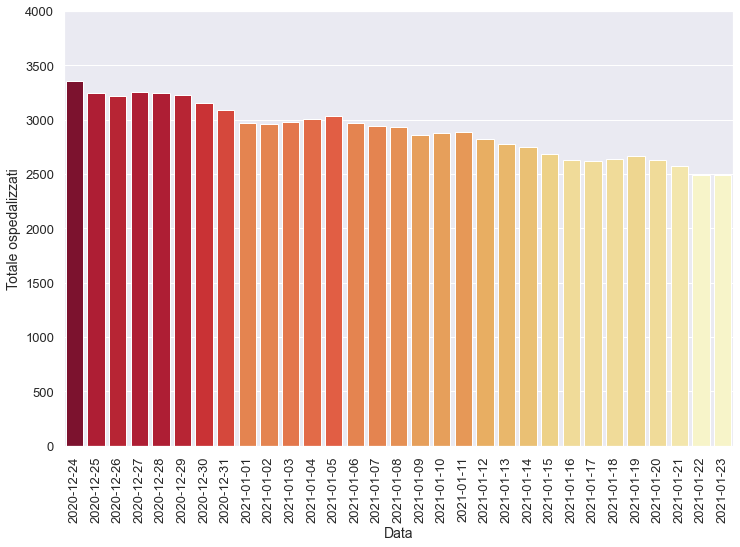

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

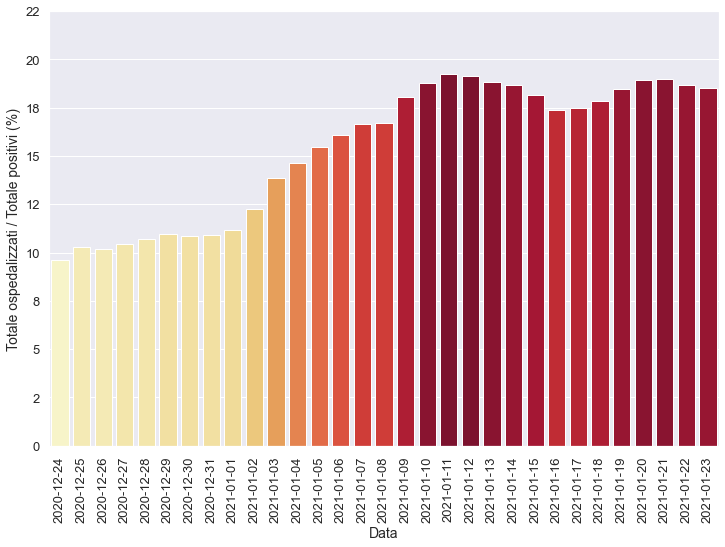

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

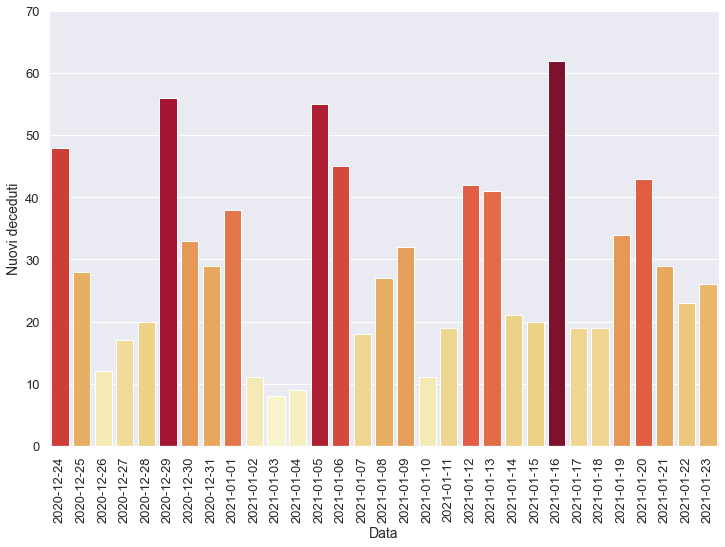

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

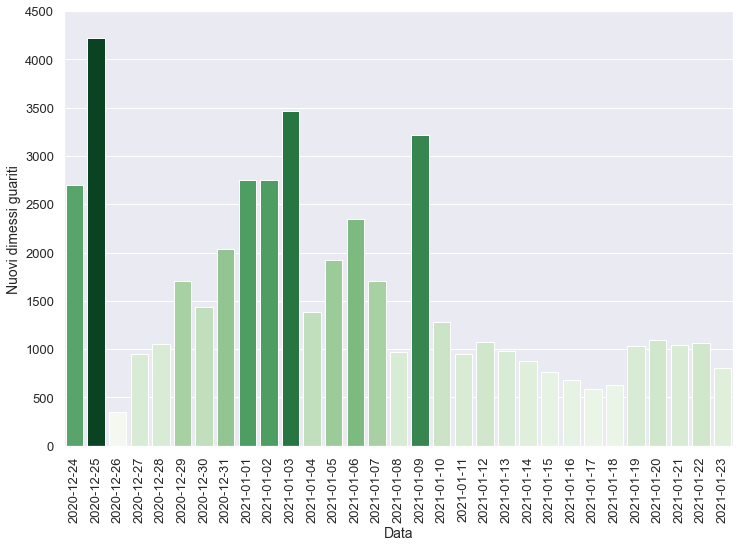

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-16T17:00:00,1,Piemonte,2464,162,2626,12488,15114,308,1056,...,62.0,24375.0,6880.0,367.0,6.17,17.37,4.33,15.35,-0.61,2.08
1,2021-01-17T17:00:00,1,Piemonte,2460,164,2624,12376,15000,-114,495,...,19.0,8643.0,2196.0,-112.0,6.25,17.49,5.73,22.54,1.23,-0.75
2,2021-01-18T17:00:00,1,Piemonte,2470,166,2636,12153,14789,-211,435,...,19.0,10817.0,2370.0,-223.0,6.30,17.82,4.02,18.35,1.22,-1.41
3,2021-01-19T17:00:00,1,Piemonte,2500,168,2668,11770,14438,-351,716,...,34.0,20319.0,5799.0,-383.0,6.30,18.48,3.52,12.35,1.20,-2.37
4,2021-01-20T17:00:00,1,Piemonte,2466,165,2631,11274,13905,-533,606,...,43.0,18868.0,3845.0,-496.0,6.27,18.92,3.21,15.76,-1.79,-3.69
5,2021-01-21T17:00:00,1,Piemonte,2419,159,2578,11015,13593,-312,761,...,29.0,17448.0,4886.0,-259.0,6.17,18.97,4.36,15.58,-3.64,-2.24
6,2021-01-22T17:00:00,1,Piemonte,2342,152,2494,10862,13356,-237,849,...,23.0,21060.0,3870.0,-153.0,6.09,18.67,4.03,21.94,-4.40,-1.74
7,2021-01-23T17:00:00,1,Piemonte,2337,156,2493,10962,13455,99,931,...,26.0,23769.0,5736.0,100.0,6.26,18.53,3.92,16.23,2.63,0.74


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

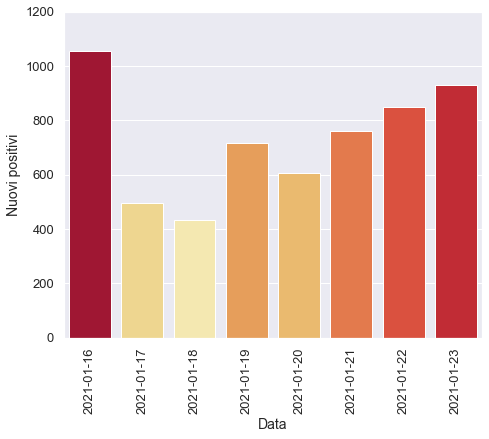

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

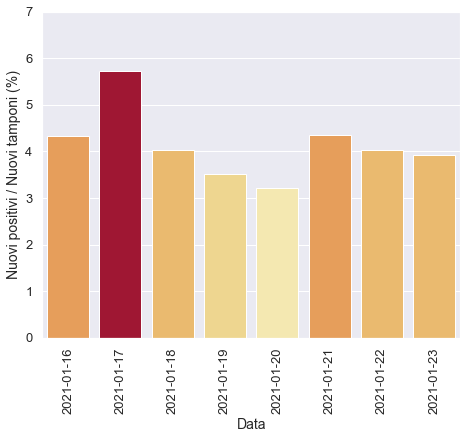

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

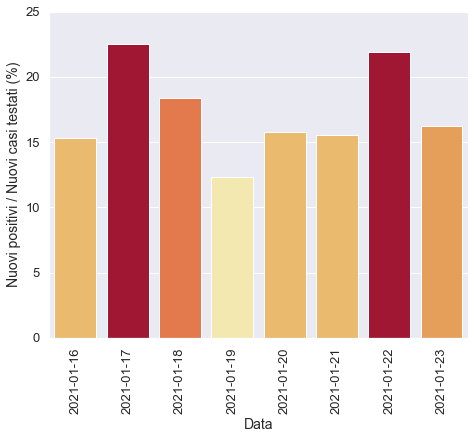

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

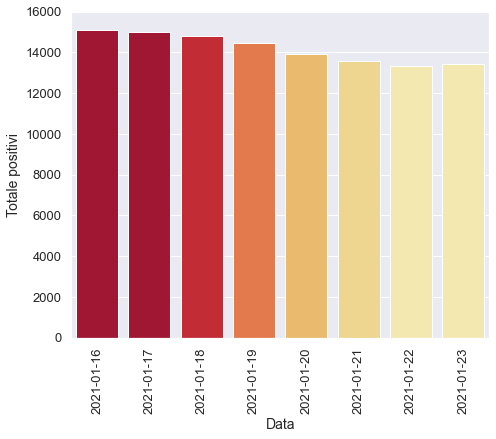

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

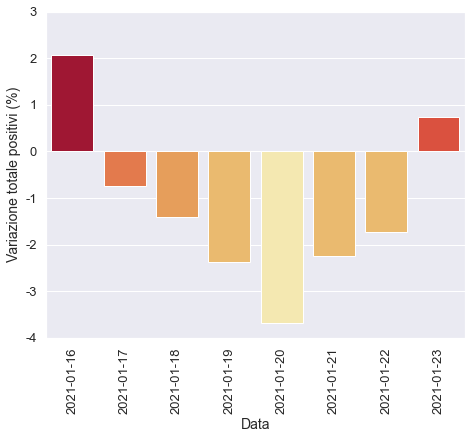

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

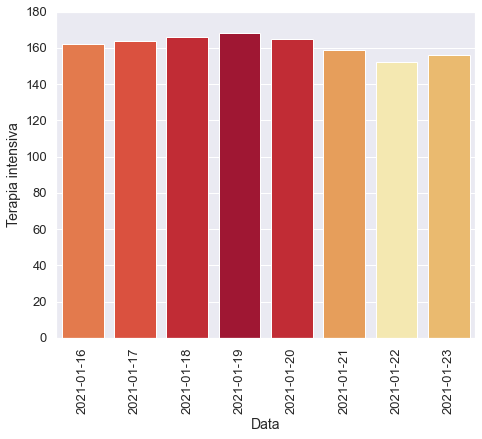

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

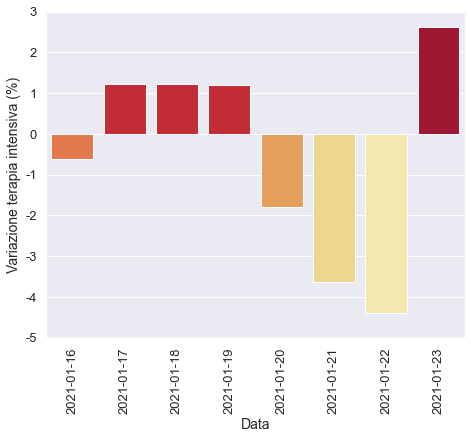

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

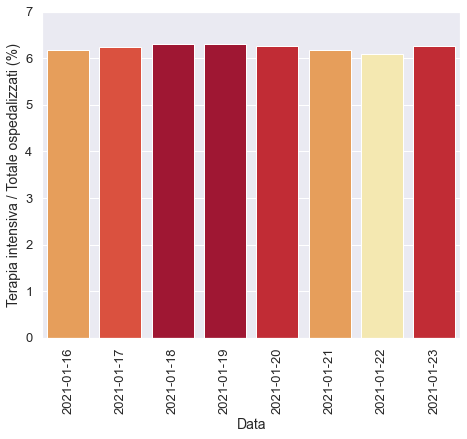

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

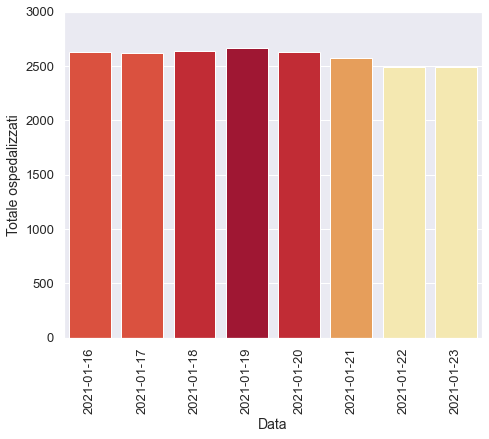

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

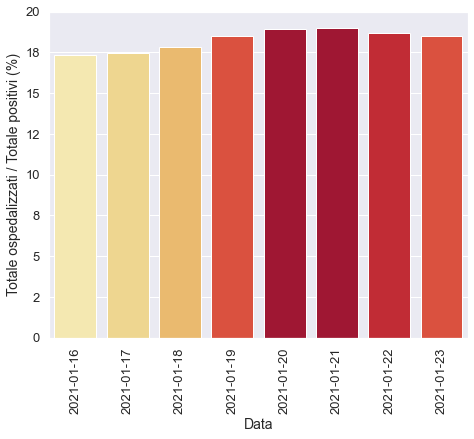

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

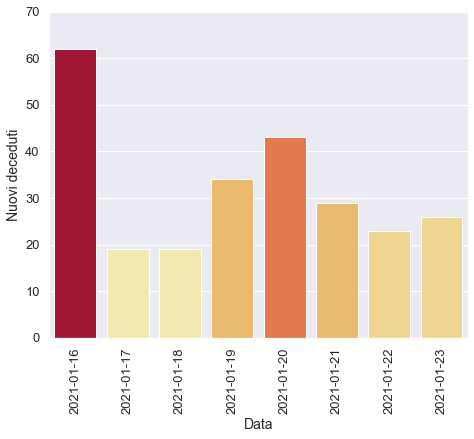

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

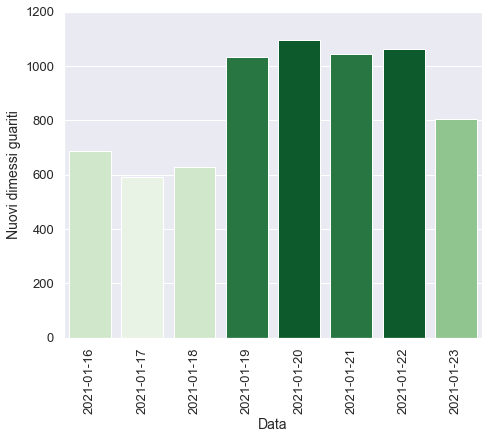

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)